## 平时作业（1）：多层神经网络的训练

- 李锦韬 2201213292

### 作业要求

**请根据自己的计算环境情况和兴趣，选择以下两个数据集之一，完成如下的实验：**    
- http://yann.lecun.com/exdb/mnist/
- https://www.cs.toronto.edu/~kriz/cifar.html

**1. 构造一个多层的神经网络（注意，不要使用卷积神经网络，本题目要求使用多层神经网络），并在上述数据集任务上进行训练，并汇报一个“使用了你认为最优的超参数配置的神经网络”的学习曲线；要求如下：**
* （1）自己手动完成反向传播算法部分的编写；
* （2）该网络应为一个“纯净”的多层神经网络，不使用正则化方法、率优化算法等；

**2. 在上述“你认为最优配置的神经网络”的基础上，**
* （1）分别汇报“增加一个隐藏层”和“减小一个隐藏层”情况下的学习曲线； 
* （2）分别汇报使用BGD和SGD进行训练的学习曲线；
* （3）分别汇报使用两种以上参数初始化方法下的学习曲线；
* （4）分别汇报使用两种以上学习率优化算法下的学习曲线；
* （5）分别汇报使用两种以上正则化方法下的学习曲线；

**最终提交：包含6个子文件夹的一个zip文件，其中的子文件夹应包含：**
* （1）对应上述6种情况之一的一份源代码；
* （2）对应上述源代码的学习曲线的一个.png文件；

## 4.不同参数初始化

### 4.1 随机初始化

Epoch 1/25, train loss: 0.141625, train acc: 0.962900, test acc: 0.958500
Epoch 2/25, train loss: 0.083247, train acc: 0.978833, test acc: 0.970000
Epoch 3/25, train loss: 0.041404, train acc: 0.983383, test acc: 0.974500
Epoch 4/25, train loss: 0.048254, train acc: 0.987850, test acc: 0.977500
Epoch 5/25, train loss: 0.017113, train acc: 0.988083, test acc: 0.974500
Epoch 6/25, train loss: 0.028824, train acc: 0.993167, test acc: 0.976700
Epoch 7/25, train loss: 0.011884, train acc: 0.994083, test acc: 0.976800
Epoch 8/25, train loss: 0.026989, train acc: 0.996783, test acc: 0.979400
Epoch 9/25, train loss: 0.004889, train acc: 0.996917, test acc: 0.977600
Epoch 10/25, train loss: 0.005792, train acc: 0.998483, test acc: 0.980100
Epoch 11/25, train loss: 0.001881, train acc: 0.999283, test acc: 0.980700
Epoch 12/25, train loss: 0.002056, train acc: 0.999450, test acc: 0.980200
Epoch 13/25, train loss: 0.001509, train acc: 0.999600, test acc: 0.979500
Epoch 14/25, train loss: 0.005754,

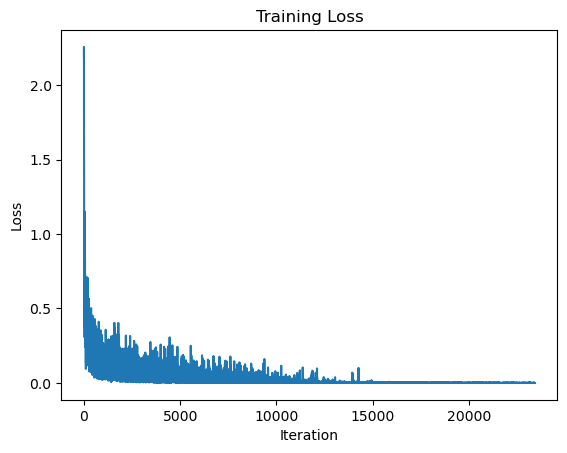

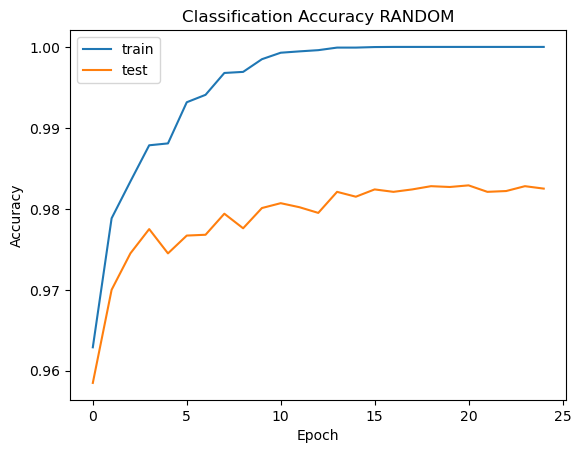

In [1]:
import numpy as np
import pickle
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# 获取MNIST数据集
def load_mnist():
    with open("../data/" + "mnist.pkl",'rb') as f:
        mnist = pickle.load(f)
    return mnist["training_images"], mnist["training_labels"], mnist["test_images"], mnist["test_labels"]
X_train, y_train, X_test, y_test = load_mnist()

# 归一化处理
X_train = X_train / 255.0
X_test = X_test / 255.0

# 标准化处理
X_train_mean = X_train.mean()
X_train_std = X_train.std()
X_train = (X_train - X_train_mean) / X_train_std
X_test = (X_test - X_train_mean) / X_train_std

# 将标签转化为one-hot向量
n_classes = 10
y_train = np.eye(n_classes)[y_train]
y_test = np.eye(n_classes)[y_test]

# 定义网络结构
input_size = X_train.shape[1]
hidden_size_1 = 128
hidden_size_2 = 64
output_size = n_classes

# 初始化权重和偏置 采用随机初始化
W1 = np.random.randn(input_size, hidden_size_1) / np.sqrt(input_size)
b1 = np.zeros(hidden_size_1)
W2 = np.random.randn(hidden_size_1, hidden_size_2) / np.sqrt(hidden_size_1)
b2 = np.zeros(hidden_size_2)
W3 = np.random.randn(hidden_size_2, output_size) / np.sqrt(hidden_size_2)
b3 = np.zeros(output_size)

# 定义激活函数和损失函数
def relu(x):
    return np.maximum(0, x)

def softmax(x):
    exps = np.exp(x - np.max(x, axis=-1, keepdims=True))
    return exps / np.sum(exps, axis=-1, keepdims=True)

def cross_entropy_loss(y_pred, y_true):
    n_samples = y_pred.shape[0]
    loss = -np.sum(y_true * np.log(y_pred + 1e-12)) / n_samples
    return loss

# 定义训练函数
def train(X, y_true, learning_rate):
    global W1, W2, W3, b1, b2, b3
    # 前向传播
    z1 = np.dot(X, W1) + b1
    a1 = relu(z1)
    z2 = np.dot(a1, W2) + b2
    a2 = relu(z2)
    z3 = np.dot(a2, W3) + b3
    y_pred = softmax(z3)
    m = y_true.shape[0]
    # 计算损失函数值和梯度
    loss = cross_entropy_loss(y_pred, y_true)

    grad_y_pred = y_pred - y_true

    grad_W3 = 1./m*np.dot(a2.T, grad_y_pred)
    grad_b3 = 1./m*np.sum(grad_y_pred, axis=0)
    grad_a2 = np.dot(grad_y_pred, W3.T)

    grad_z2 = grad_a2.copy()
    grad_z2[z2 < 0] = 0
    grad_W2 = 1./m*np.dot(a1.T, grad_z2)
    grad_b2 = 1./m*np.sum(grad_z2, axis=0)
    grad_a1 = np.dot(grad_z2, W2.T)

    grad_z1 = grad_a1.copy()
    grad_z1[z1 < 0] = 0
    grad_W1 = 1./m*np.dot(X.T, grad_z1)
    grad_b1 = 1./m*np.sum(grad_z1, axis=0)

    # 更新权重和偏置
    W3 -= learning_rate * grad_W3
    b3 -= learning_rate * grad_b3
    W2 -= learning_rate * grad_W2
    b2 -= learning_rate * grad_b2
    W1 -= learning_rate * grad_W1
    b1 -= learning_rate * grad_b1

    return loss

def predict(X):
    global W1, W2, W3, b1, b2, b3
    z1 = np.dot(X, W1) + b1
    a1 = relu(z1)
    z2 = np.dot(a1, W2) + b2
    a2 = relu(z2)
    z3 = np.dot(a2, W3) + b3
    y_pred = softmax(z3)
    return np.argmax(y_pred, axis=-1)

learning_rate = 0.1
num_epochs = 25
batch_size = 64
num_batches = X_train.shape[0] // batch_size

train_loss_history = []
train_acc_history1 = []
test_acc_history1 = []
for epoch in range(num_epochs):
    # 在每个epoch前随机打乱训练数据
    permutation = np.random.permutation(X_train.shape[0])
    X_train = X_train[permutation]
    y_train = y_train[permutation]
    for i in range(num_batches):
        # 从训练数据中随机抽取一个batch
        X_batch = X_train[i * batch_size:(i + 1) * batch_size]
        y_batch = y_train[i * batch_size:(i + 1) * batch_size]

        # 训练一个batch，并记录损失函数值
        loss = train(X_batch, y_batch, learning_rate)
        train_loss_history.append(loss)

    # 计算训练集和测试集上的精度
    train_acc = np.mean(predict(X_train) == np.argmax(y_train, axis=-1))
    test_acc = np.mean(predict(X_test) == np.argmax(y_test, axis=-1))
    train_acc_history1.append(train_acc)
    test_acc_history1.append(test_acc)

    # 输出训练进度
    print('Epoch %d/%d, train loss: %f, train acc: %f, test acc: %f' % (epoch+1, num_epochs, loss, train_acc, test_acc))

plt.plot(train_loss_history)
plt.title('Training Loss')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.show()

plt.plot(train_acc_history1, label='train')
plt.plot(test_acc_history1, label='test')
plt.title('Classification Accuracy RANDOM')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

### 4.2 Xavier初始化

Epoch 1/25, train loss: 0.287529, train acc: 0.950033, test acc: 0.945200
Epoch 2/25, train loss: 0.082980, train acc: 0.964700, test acc: 0.954400
Epoch 3/25, train loss: 0.093645, train acc: 0.974383, test acc: 0.961700
Epoch 4/25, train loss: 0.067461, train acc: 0.978517, test acc: 0.964000
Epoch 5/25, train loss: 0.052424, train acc: 0.980750, test acc: 0.964500
Epoch 6/25, train loss: 0.085432, train acc: 0.984150, test acc: 0.966800
Epoch 7/25, train loss: 0.040974, train acc: 0.989367, test acc: 0.969900
Epoch 8/25, train loss: 0.066129, train acc: 0.986183, test acc: 0.965700
Epoch 9/25, train loss: 0.039367, train acc: 0.989983, test acc: 0.968800
Epoch 10/25, train loss: 0.003178, train acc: 0.992917, test acc: 0.968400
Epoch 11/25, train loss: 0.002008, train acc: 0.993700, test acc: 0.968600
Epoch 12/25, train loss: 0.035627, train acc: 0.995567, test acc: 0.970900
Epoch 13/25, train loss: 0.106911, train acc: 0.993067, test acc: 0.966400
Epoch 14/25, train loss: 0.014495,

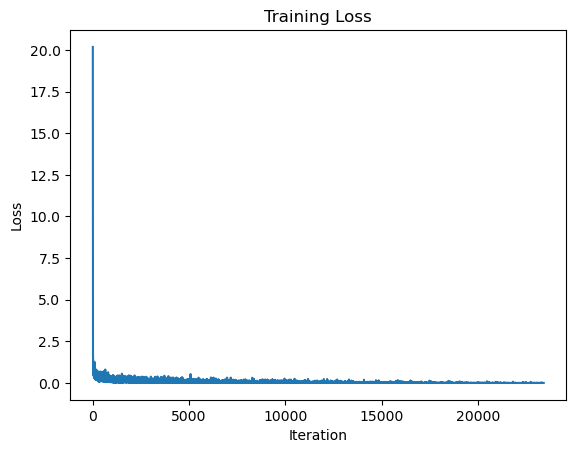

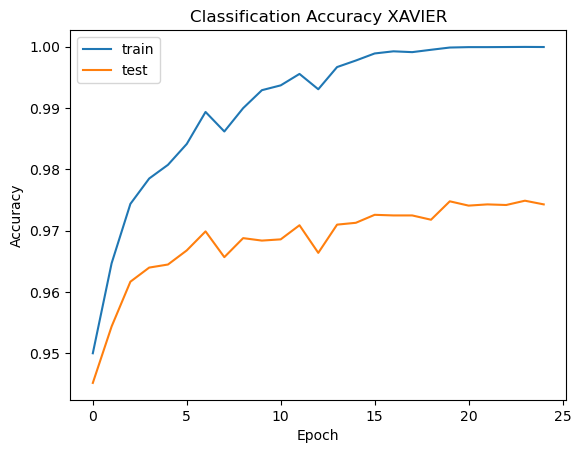

In [2]:
import numpy as np
import pickle
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# 获取MNIST数据集
def load_mnist():
    with open("../data/" + "mnist.pkl",'rb') as f:
        mnist = pickle.load(f)
    return mnist["training_images"], mnist["training_labels"], mnist["test_images"], mnist["test_labels"]
X_train, y_train, X_test, y_test = load_mnist()

# 归一化处理
X_train = X_train / 255.0
X_test = X_test / 255.0

# 标准化处理
X_train_mean = X_train.mean()
X_train_std = X_train.std()
X_train = (X_train - X_train_mean) / X_train_std
X_test = (X_test - X_train_mean) / X_train_std

# 将标签转化为one-hot向量
n_classes = 10
y_train = np.eye(n_classes)[y_train]
y_test = np.eye(n_classes)[y_test]

# 定义网络结构
input_size = X_train.shape[1]
hidden_size_1 = 128
hidden_size_2 = 64
output_size = n_classes

# 初始化权重和偏置 采用Xavier初始化
W1 = np.random.randn(input_size, hidden_size_1) / np.sqrt(hidden_size_1 / 2)
b1 = np.zeros(hidden_size_1)
W2 = np.random.randn(hidden_size_1, hidden_size_2) / np.sqrt(hidden_size_2 / 2)
b2 = np.zeros(hidden_size_2)
W3 = np.random.randn(hidden_size_2, output_size) / np.sqrt(output_size / 2)
b3 = np.zeros(output_size)

# 定义激活函数和损失函数
def relu(x):
    return np.maximum(0, x)

def softmax(x):
    exps = np.exp(x - np.max(x, axis=-1, keepdims=True))
    return exps / np.sum(exps, axis=-1, keepdims=True)

def cross_entropy_loss(y_pred, y_true):
    n_samples = y_pred.shape[0]
    loss = -np.sum(y_true * np.log(y_pred + 1e-12)) / n_samples
    return loss

# 定义训练函数
def train(X, y_true, learning_rate):
    global W1, W2, W3, b1, b2, b3
    # 前向传播
    z1 = np.dot(X, W1) + b1
    a1 = relu(z1)
    z2 = np.dot(a1, W2) + b2
    a2 = relu(z2)
    z3 = np.dot(a2, W3) + b3
    y_pred = softmax(z3)
    m = y_true.shape[0]
    # 计算损失函数值和梯度
    loss = cross_entropy_loss(y_pred, y_true)

    grad_y_pred = y_pred - y_true

    grad_W3 = 1./m*np.dot(a2.T, grad_y_pred)
    grad_b3 = 1./m*np.sum(grad_y_pred, axis=0)
    grad_a2 = np.dot(grad_y_pred, W3.T)

    grad_z2 = grad_a2.copy()
    grad_z2[z2 < 0] = 0
    grad_W2 = 1./m*np.dot(a1.T, grad_z2)
    grad_b2 = 1./m*np.sum(grad_z2, axis=0)
    grad_a1 = np.dot(grad_z2, W2.T)

    grad_z1 = grad_a1.copy()
    grad_z1[z1 < 0] = 0
    grad_W1 = 1./m*np.dot(X.T, grad_z1)
    grad_b1 = 1./m*np.sum(grad_z1, axis=0)

    # 更新权重和偏置
    W3 -= learning_rate * grad_W3
    b3 -= learning_rate * grad_b3
    W2 -= learning_rate * grad_W2
    b2 -= learning_rate * grad_b2
    W1 -= learning_rate * grad_W1
    b1 -= learning_rate * grad_b1

    return loss

def predict(X):
    global W1, W2, W3, b1, b2, b3
    z1 = np.dot(X, W1) + b1
    a1 = relu(z1)
    z2 = np.dot(a1, W2) + b2
    a2 = relu(z2)
    z3 = np.dot(a2, W3) + b3
    y_pred = softmax(z3)
    return np.argmax(y_pred, axis=-1)

learning_rate = 0.1
num_epochs = 25
batch_size = 64
num_batches = X_train.shape[0] // batch_size

train_loss_history = []
train_acc_history2 = []
test_acc_history2 = []
for epoch in range(num_epochs):
    # 在每个epoch前随机打乱训练数据
    permutation = np.random.permutation(X_train.shape[0])
    X_train = X_train[permutation]
    y_train = y_train[permutation]
    for i in range(num_batches):
        # 从训练数据中随机抽取一个batch
        X_batch = X_train[i * batch_size:(i + 1) * batch_size]
        y_batch = y_train[i * batch_size:(i + 1) * batch_size]

        # 训练一个batch，并记录损失函数值
        loss = train(X_batch, y_batch, learning_rate)
        train_loss_history.append(loss)

    # 计算训练集和测试集上的精度
    train_acc = np.mean(predict(X_train) == np.argmax(y_train, axis=-1))
    test_acc = np.mean(predict(X_test) == np.argmax(y_test, axis=-1))
    train_acc_history2.append(train_acc)
    test_acc_history2.append(test_acc)

    # 输出训练进度
    print('Epoch %d/%d, train loss: %f, train acc: %f, test acc: %f' % (epoch+1, num_epochs, loss, train_acc, test_acc))

plt.plot(train_loss_history)
plt.title('Training Loss')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.show()

plt.plot(train_acc_history2, label='train')
plt.plot(test_acc_history2, label='test')
plt.title('Classification Accuracy XAVIER')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

### 4.3 高斯初始化

Epoch 1/25, train loss: 0.230551, train acc: 0.953017, test acc: 0.948200
Epoch 2/25, train loss: 0.059133, train acc: 0.972233, test acc: 0.966900
Epoch 3/25, train loss: 0.029171, train acc: 0.979900, test acc: 0.971600
Epoch 4/25, train loss: 0.215877, train acc: 0.984983, test acc: 0.975300
Epoch 5/25, train loss: 0.071930, train acc: 0.987017, test acc: 0.974500
Epoch 6/25, train loss: 0.072391, train acc: 0.988700, test acc: 0.972900
Epoch 7/25, train loss: 0.018829, train acc: 0.990450, test acc: 0.974600
Epoch 8/25, train loss: 0.001106, train acc: 0.995283, test acc: 0.978700
Epoch 9/25, train loss: 0.005832, train acc: 0.996383, test acc: 0.978000
Epoch 10/25, train loss: 0.015191, train acc: 0.995933, test acc: 0.978100
Epoch 11/25, train loss: 0.001553, train acc: 0.997983, test acc: 0.979900
Epoch 12/25, train loss: 0.010561, train acc: 0.996967, test acc: 0.978000
Epoch 13/25, train loss: 0.006766, train acc: 0.999317, test acc: 0.980900
Epoch 14/25, train loss: 0.001393,

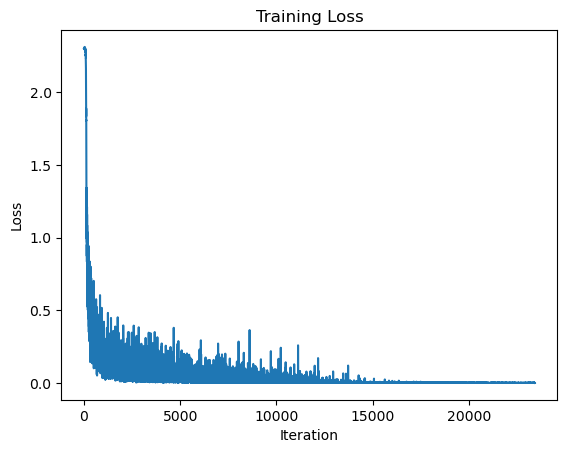

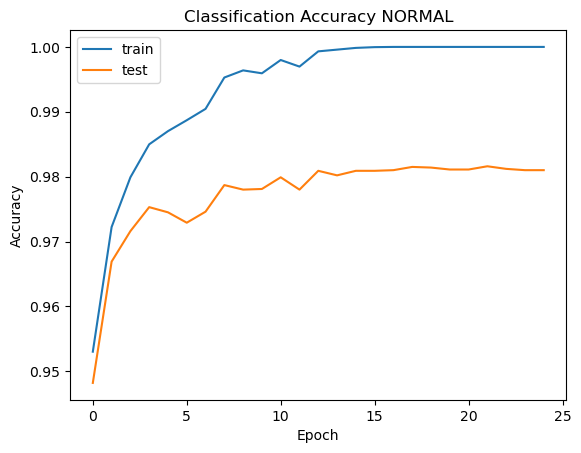

In [3]:
import numpy as np
import pickle
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# 获取MNIST数据集
def load_mnist():
    with open("../data/" + "mnist.pkl",'rb') as f:
        mnist = pickle.load(f)
    return mnist["training_images"], mnist["training_labels"], mnist["test_images"], mnist["test_labels"]
X_train, y_train, X_test, y_test = load_mnist()

# 归一化处理
X_train = X_train / 255.0
X_test = X_test / 255.0

# 标准化处理
X_train_mean = X_train.mean()
X_train_std = X_train.std()
X_train = (X_train - X_train_mean) / X_train_std
X_test = (X_test - X_train_mean) / X_train_std

# 将标签转化为one-hot向量
n_classes = 10
y_train = np.eye(n_classes)[y_train]
y_test = np.eye(n_classes)[y_test]

# 定义网络结构
input_size = X_train.shape[1]
hidden_size_1 = 128
hidden_size_2 = 64
output_size = n_classes

# 初始化权重和偏置 采用高斯初始化
W1 = np.random.normal(loc=0.0, scale=1.0, size=(input_size, hidden_size_1)) * 0.01
b1 = np.zeros(hidden_size_1)
W2 = np.random.normal(loc=0.0, scale=1.0, size=(hidden_size_1, hidden_size_2)) * 0.01
b2 = np.zeros(hidden_size_2)
W3 = np.random.normal(loc=0.0, scale=1.0, size=(hidden_size_2, output_size)) * 0.01
b3 = np.zeros(output_size)

# 定义激活函数和损失函数
def relu(x):
    return np.maximum(0, x)

def softmax(x):
    exps = np.exp(x - np.max(x, axis=-1, keepdims=True))
    return exps / np.sum(exps, axis=-1, keepdims=True)

def cross_entropy_loss(y_pred, y_true):
    n_samples = y_pred.shape[0]
    loss = -np.sum(y_true * np.log(y_pred + 1e-12)) / n_samples
    return loss

# 定义训练函数
def train(X, y_true, learning_rate):
    global W1, W2, W3, b1, b2, b3
    # 前向传播
    z1 = np.dot(X, W1) + b1
    a1 = relu(z1)
    z2 = np.dot(a1, W2) + b2
    a2 = relu(z2)
    z3 = np.dot(a2, W3) + b3
    y_pred = softmax(z3)
    m = y_true.shape[0]
    # 计算损失函数值和梯度
    loss = cross_entropy_loss(y_pred, y_true)

    grad_y_pred = y_pred - y_true

    grad_W3 = 1./m*np.dot(a2.T, grad_y_pred)
    grad_b3 = 1./m*np.sum(grad_y_pred, axis=0)
    grad_a2 = np.dot(grad_y_pred, W3.T)

    grad_z2 = grad_a2.copy()
    grad_z2[z2 < 0] = 0
    grad_W2 = 1./m*np.dot(a1.T, grad_z2)
    grad_b2 = 1./m*np.sum(grad_z2, axis=0)
    grad_a1 = np.dot(grad_z2, W2.T)

    grad_z1 = grad_a1.copy()
    grad_z1[z1 < 0] = 0
    grad_W1 = 1./m*np.dot(X.T, grad_z1)
    grad_b1 = 1./m*np.sum(grad_z1, axis=0)

    # 更新权重和偏置
    W3 -= learning_rate * grad_W3
    b3 -= learning_rate * grad_b3
    W2 -= learning_rate * grad_W2
    b2 -= learning_rate * grad_b2
    W1 -= learning_rate * grad_W1
    b1 -= learning_rate * grad_b1

    return loss

def predict(X):
    global W1, W2, W3, b1, b2, b3
    z1 = np.dot(X, W1) + b1
    a1 = relu(z1)
    z2 = np.dot(a1, W2) + b2
    a2 = relu(z2)
    z3 = np.dot(a2, W3) + b3
    y_pred = softmax(z3)
    return np.argmax(y_pred, axis=-1)

learning_rate = 0.1
num_epochs = 25
batch_size = 64
num_batches = X_train.shape[0] // batch_size

train_loss_history = []
train_acc_history3 = []
test_acc_history3 = []
for epoch in range(num_epochs):
    # 在每个epoch前随机打乱训练数据
    permutation = np.random.permutation(X_train.shape[0])
    X_train = X_train[permutation]
    y_train = y_train[permutation]
    for i in range(num_batches):
        # 从训练数据中随机抽取一个batch
        X_batch = X_train[i * batch_size:(i + 1) * batch_size]
        y_batch = y_train[i * batch_size:(i + 1) * batch_size]

        # 训练一个batch，并记录损失函数值
        loss = train(X_batch, y_batch, learning_rate)
        train_loss_history.append(loss)

    # 计算训练集和测试集上的精度
    train_acc = np.mean(predict(X_train) == np.argmax(y_train, axis=-1))
    test_acc = np.mean(predict(X_test) == np.argmax(y_test, axis=-1))
    train_acc_history3.append(train_acc)
    test_acc_history3.append(test_acc)

    # 输出训练进度
    print('Epoch %d/%d, train loss: %f, train acc: %f, test acc: %f' % (epoch+1, num_epochs, loss, train_acc, test_acc))

plt.plot(train_loss_history)
plt.title('Training Loss')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.show()

plt.plot(train_acc_history3, label='train')
plt.plot(test_acc_history3, label='test')
plt.title('Classification Accuracy NORMAL')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

## 学习曲线对比

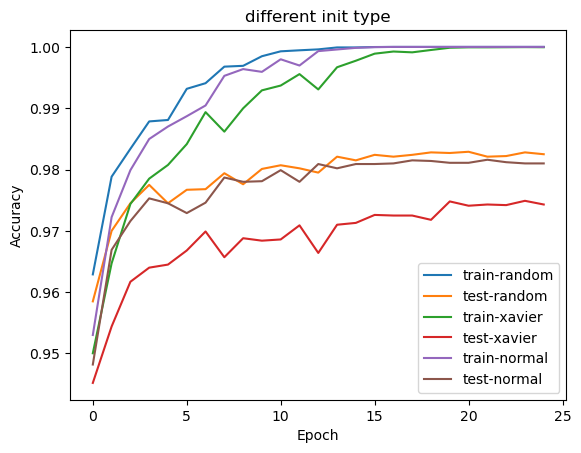

In [4]:
plt.plot(train_acc_history1, label='train-random')
plt.plot(test_acc_history1, label='test-random')
plt.plot(train_acc_history2, label='train-xavier')
plt.plot(test_acc_history2, label='test-xavier')
plt.plot(train_acc_history3, label='train-normal')
plt.plot(test_acc_history3, label='test-normal')
plt.title('different init type')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.savefig('different init type.png')
plt.show()